In [1]:
!pip install calmap plotly_calplot -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import calmap
from plotly_calplot import calplot
from pathlib import Path

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

Can you predict which flights will be cancelled or delayed?

Can you predict the delay time?

Can you explore how different airlines compare?

Given the extensive set of features available to us within the Flights dataset, we are trying to explore an answer to the following questions –

1.
Temporal Trends – Are there specific years, months, days of the week or days in the year which are associated with higher flight delays and cancellations?

2.
What is the impact of a major disruption on day-to-day flight travel, such as the COVID pandemic? What were the trends before and after the pandemic?

3.
Compare the performance of different airlines based on the following metrics:
a.
Most delays
b.
Frequency of flight cancellations.
c.
Most reliable

4.
Predictive Modelling – Predicting flight cancellations.

5.
Whether Taxi in Taxi out data has any impact on the delay and cancellation of flights.

# Exploratory Data Analysis

In [4]:
columns = ['FlightDate','Airline','Origin','Dest',
          'Cancelled','Diverted','CRSDepTime','DepTime',
          'DepDelayMinutes','DepDelay','ArrTime','CRSElapsedTime',
          'ActualElapsedTime','Distance','Quarter','Month',
          'DayofMonth','DayOfWeek','Operating_Airline','OriginCityName',
           'OriginState','OriginStateName','DestCityName','DestState',
          'DestStateName','TaxiOut','TaxiIn','CRSArrTime','ArrDelay']

In [5]:
df = pd.read_parquet("final_flight_status.parquet",engine = "pyarrow",columns = columns)

In [6]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]

for c in cat_cols:
    df[c] = df[c].astype("category")

In [13]:
# Extract additional temporal information
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month
df['DayOfWeek'] = df['FlightDate'].dt.day_of_week
df['DayOfYear'] = df['FlightDate'].dt.dayofyear

In [4]:
df['DepDelay'].isnull().sum()

763084

In [6]:
df['DepDelayMinutes'].isnull().sum()

763084

In [5]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62.0,59.0,145.0,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62.0,61.0,145.0,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62.0,69.0,145.0,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62.0,63.0,145.0,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60.0,64.0,145.0,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [129]:
df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,CRSElapsedTime,ActualElapsedTime,Distance,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,OriginCityName,OriginState,OriginStateName,DestCityName,DestState,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrDelay,DelayGroup,Year,DayOfYear,Pandemic
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,62.0,59.0,145.0,1,January,23,Tuesday,9E,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,14.0,7.0,1304,-8.0,OnTime_Early,2018,23,Before Pandemic
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,62.0,61.0,145.0,1,January,24,Wednesday,9E,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,13.0,12.0,1304,-6.0,OnTime_Early,2018,24,Before Pandemic
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,62.0,69.0,145.0,1,January,25,Thursday,9E,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,18.0,11.0,1304,-2.0,OnTime_Early,2018,25,Before Pandemic
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,62.0,63.0,145.0,1,January,26,Friday,9E,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,17.0,11.0,1304,-11.0,OnTime_Early,2018,26,Before Pandemic
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,60.0,64.0,145.0,1,January,27,Saturday,9E,"Albany, GA",GA,Georgia,"Atlanta, GA",GA,Georgia,17.0,11.0,1500,-1.0,OnTime_Early,2018,27,Before Pandemic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193777,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,234.0,185.0,NaN,1167.0,1,March,31,Thursday,YX,"New Orleans, LA",LA,Louisiana,"Newark, NJ",NJ,New Jersey,17.0,32.0,2354,NaN,Medium_Delay,2022,90,During Pandemic
29193778,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,NaN,129.0,NaN,529.0,1,March,17,Thursday,YX,"Charlotte, NC",NC,North Carolina,"Newark, NJ",NJ,New Jersey,NaN,NaN,1942,NaN,Cancelled,2022,76,During Pandemic
29193779,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,59.0,158.0,161.0,723.0,1,March,8,Tuesday,YX,"Albany, NY",NY,New York,"Chicago, IL",IL,Illinois,19.0,7.0,1838,381.0,Large_Delay,2022,67,During Pandemic
29193780,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,939.0,86.0,NaN,319.0,1,March,25,Friday,YX,"Newark, NJ",NJ,New Jersey,"Pittsburgh, PA",PA,Pennsylvania,25.0,6.0,2255,NaN,Large_Delay,2022,84,During Pandemic


In [146]:
df['Month']

0           1
1           1
2           1
3           1
4           1
           ..
29193777    3
29193778    3
29193779    3
29193780    3
29193781    3
Name: Month, Length: 29193782, dtype: int64

## Delay Analysis - Understanding the Delay - Column : DepDelayMinutes

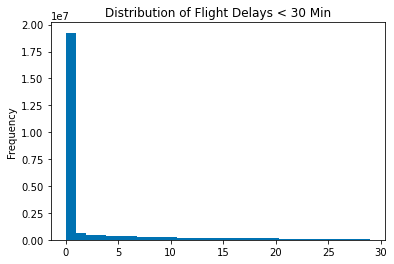

In [32]:
df.query("DepDelayMinutes < 30")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

As most of the flights are with no delay (0 min), It is seen that the '0' is the highest accumulation, which overshadows the real delays.

We will exclude zero delays

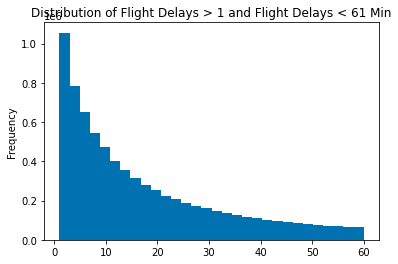

In [78]:
df.query("DepDelayMinutes > 0 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays > 1 and Flight Delays < 61 Min"
)
plt.show()

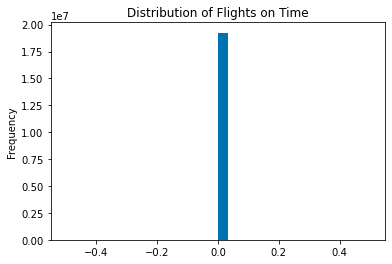

In [21]:
# Ontime

df.query("DepDelayMinutes == 0 ")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flights on Time"
)
plt.show()

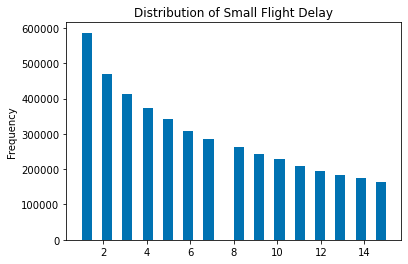

In [22]:
#Small Delays

df.query("DepDelayMinutes > 0 and DepDelayMinutes <= 15")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Small Flight Delay"
)
plt.show()

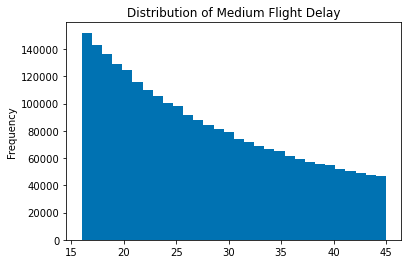

In [25]:
#Medium Delays

df.query("DepDelayMinutes > 15 and DepDelayMinutes <= 45")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Medium Flight Delay"
)
plt.show()

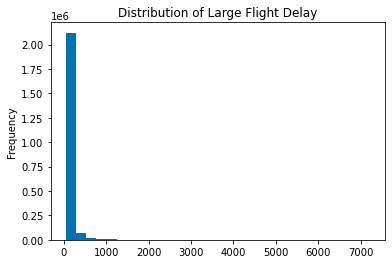

In [26]:
#Large Delays

df.query("DepDelayMinutes > 45")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Large Flight Delay"
)
plt.show()

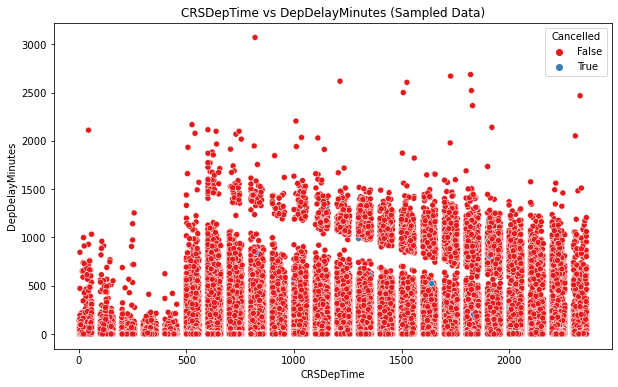

In [15]:
# Scatter plot for CRSDepTime vs DepDelayMinutes (Sampled Data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRSDepTime', y='DepDelayMinutes', data=sampled_df, hue='Cancelled', palette='Set1')
plt.title('CRSDepTime vs DepDelayMinutes (Sampled Data)')
plt.xlabel('CRSDepTime')
plt.ylabel('DepDelayMinutes')
plt.show()

## Grouping of Delays  - Categories

Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay).

In [7]:
df["DelayGroup"] = None

df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"

df.loc[(df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"] = "Small_Delay"

df.loc[(df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"] = "Medium_Delay"

df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"

df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

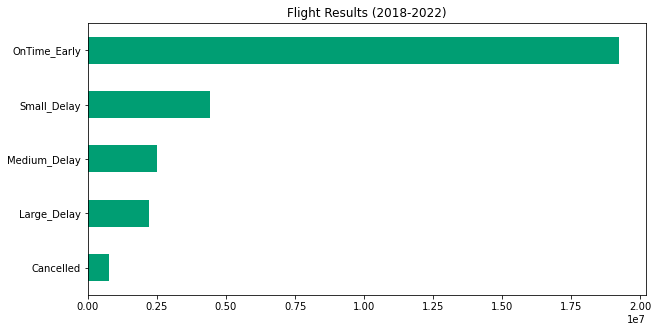

In [8]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results (2018-2022)"
)
plt.show()

## Temporal Trends  - Delays

### Flight Count Per Year - How many flights are there per year?

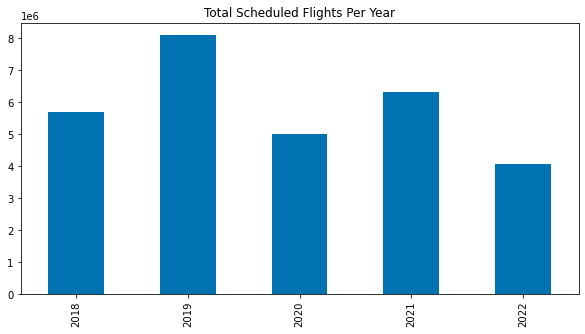

In [13]:
df["Year"] = df['FlightDate'].dt.year

df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Total Scheduled Flights Per Year"
)

plt.show()

### Monthly Trend

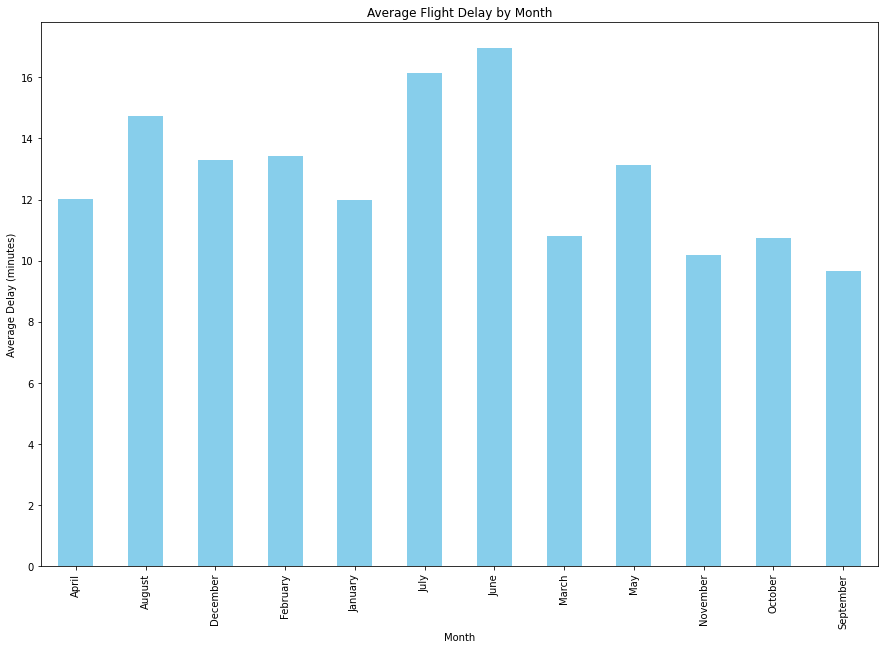

In [105]:
mean_delay_by_month = df.groupby('Month')['DepDelayMinutes'].mean()
plt.figure(figsize=(15, 10))
mean_delay_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.show()

### Flight Delay by Day of Week

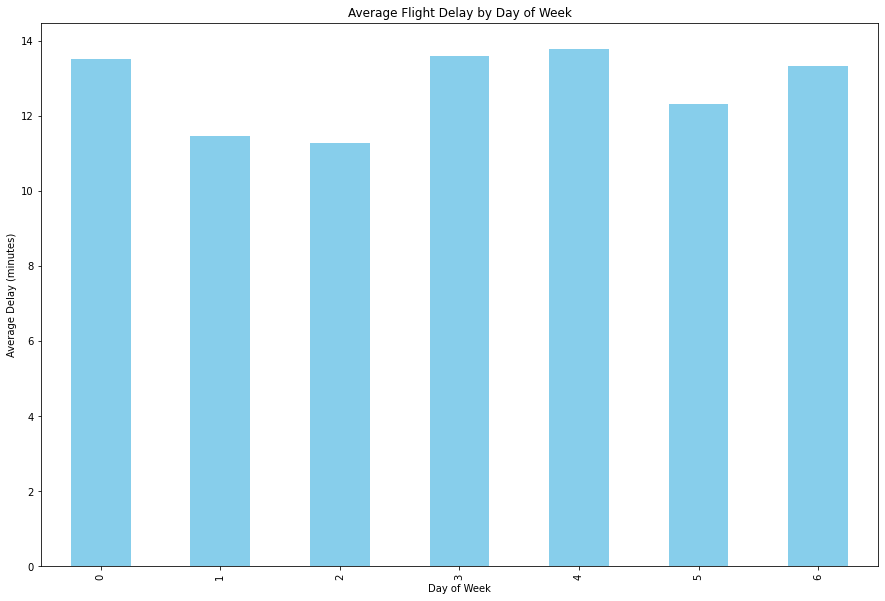

In [27]:
mean_delay_by_day = df.groupby('DayOfWeek')['DepDelayMinutes'].mean()
plt.figure(figsize=(15, 10))
mean_delay_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Flight Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.show()

### Delay on which day of Year

Text(0.5, 1.0, 'Average Flight Delay by Day of Year')

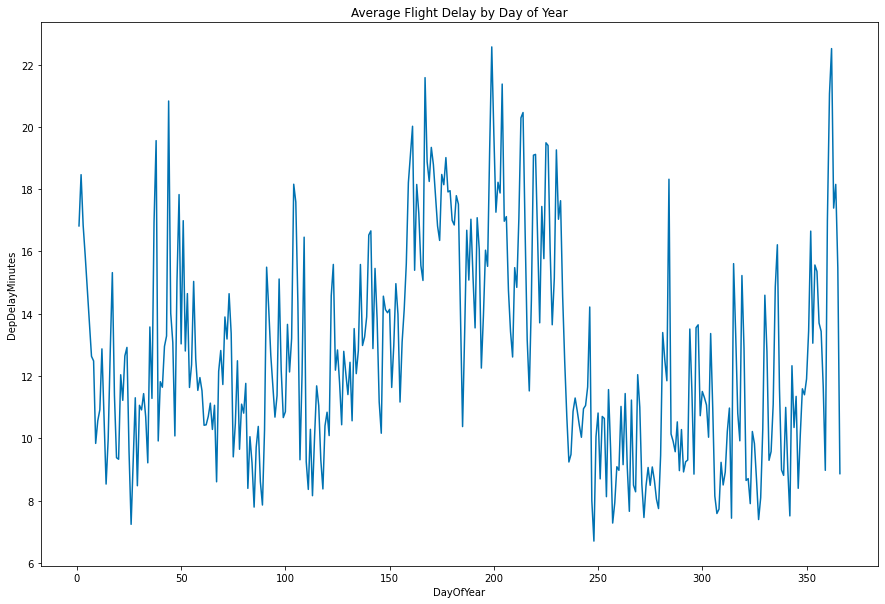

In [18]:
plt.figure(figsize=(15, 10))


sns.lineplot(x='DayOfYear', y='DepDelayMinutes', data=df, estimator='mean', ci=None)
plt.title('Average Flight Delay by Day of Year')

### Percentage of Flight Delays by year

In [144]:
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,64.115615,16.474583,9.538448,8.317789,1.553565
2019,64.619787,15.716778,9.081583,8.683248,1.898604
2020,76.052291,9.653418,4.572319,3.727722,5.994249
2021,65.698142,16.145308,8.917879,7.479795,1.758876
2022,58.801153,17.706368,10.926539,9.545283,3.020657


### Percentage of Flight Delays by Month

In [145]:
df["Month"] = df["FlightDate"].dt.month

df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,68.169907,13.961832,7.878093,7.008976,2.981192
2,64.960611,15.300969,8.828322,7.786858,3.123240
3,66.363322,14.172305,7.716007,6.173113,5.575252
4,64.436275,14.051844,7.824258,6.853866,6.833756
5,65.023841,16.224252,8.965554,7.875154,1.911198
6,59.488265,17.349791,10.754222,10.442093,1.965629
7,61.996702,16.361900,10.052315,9.906083,1.683000
8,64.622096,15.009025,9.096512,9.137345,2.135022
9,72.924881,13.140776,6.725733,5.813787,1.394822


## Excluding 2020 because of high number of cancelled flights

In [27]:
df_agg = (
    df.query("Year != 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,67.162457,13.880797,8.068641,7.353867,3.534239
2,62.623134,15.912800,9.424684,8.139587,3.899795
3,65.869000,16.332230,8.904784,7.101697,1.792290
4,66.161402,15.715543,8.783821,7.685515,1.653719
5,63.468665,17.070321,9.537899,8.407955,1.515159
6,56.855480,18.188167,11.525967,11.298683,2.131703
7,58.511717,17.645319,11.048691,10.968325,1.825949
8,60.348823,16.490201,10.289753,10.508081,2.363141
9,70.637088,14.016242,7.374660,6.454308,1.517702


#### Why high cancellation in March/April?  What does it look like by year for these months?

In [28]:
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,64.219260,17.194531,9.582907,7.347652,1.655651
2019,65.790141,15.462990,8.614418,7.974924,2.157527
2020,63.063286,6.202543,3.291875,2.733237,24.709059
2021,76.291254,13.015721,5.715776,4.077733,0.899516
2022,59.301505,18.234213,11.096981,9.445164,1.922137


### Analysis for flights delayed for more than 1 hour

In [140]:
mask =df['DepDelayMinutes']>60

print("Their are {} Flights Delayed by 60 Minutes".format(len(df[mask])))

Their are 1673525 Flights Delayed by 60 Minutes


In [141]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Flights with delays greater than 1 hour'}>

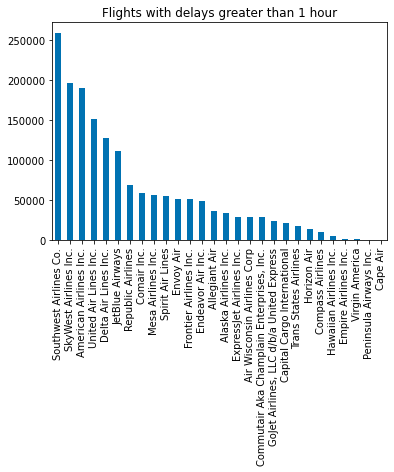

In [142]:
df[mask]['Airline'].value_counts().plot(kind='bar',title = 'Flights with delays greater than 1 hour')

Text(0.5, 1.0, 'Visualizing if increase in distance is leading to more departure time')

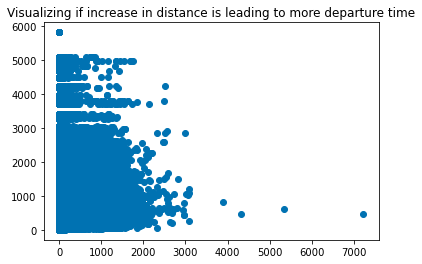

In [76]:
plt.scatter(df['DepDelayMinutes'], df['Distance'])

plt.title('Visualizing if increase in distance is leading to more departure time')

In [73]:
filtered_df = df[mask]

### Distance vs Delay

Text(0.5, 1.0, 'Visualizing if increase in distance is leading to more departure time')

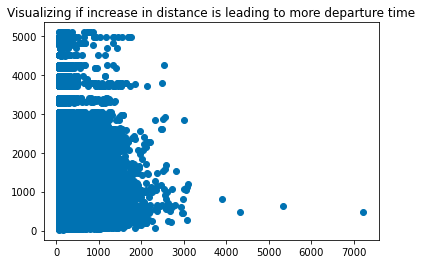

In [77]:
plt.scatter(filtered_df['DepDelayMinutes'], filtered_df['Distance'])

plt.title('Visualizing if increase in distance is leading to more departure time')

## Temporal Trends  - Cancelled Flights - Analysis

### Plotting using calmap

<AxesSubplot:title={'center':'Total Cancelled Flights Per Year'}, xlabel='Year'>

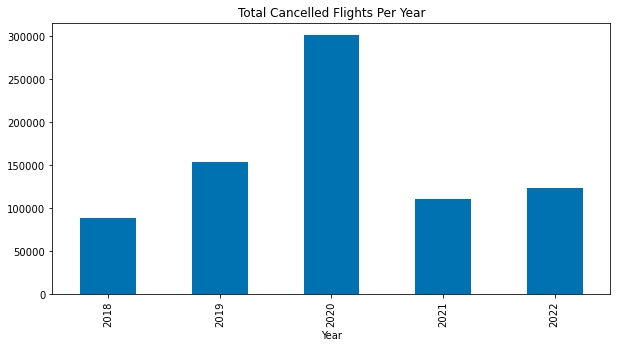

In [138]:
df[df['Cancelled'] == True].groupby("Year")["Cancelled"].count().plot(kind='bar',figsize=(10, 5), title="Total Cancelled Flights Per Year")

In [132]:
flight_cancelled_count = df.groupby("Year")["Cancelled"].count()

In [133]:
flight_cancelled_count

Year
2018    5689512
2019    8091684
2020    5022397
2021    6311871
2022    4078318
Name: Cancelled, dtype: int64

<AxesSubplot:title={'center':'Total Cancelled Flights Per Year'}, xlabel='Year'>

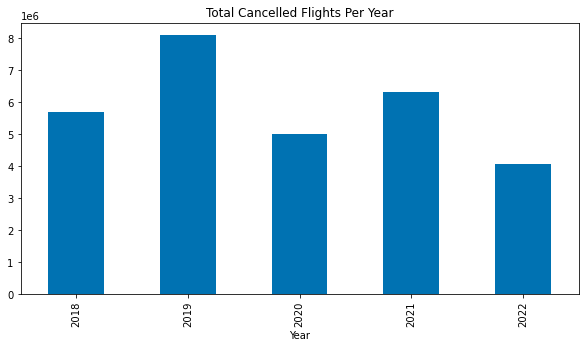

In [135]:
flight_cancelled_count.plot(kind='bar',figsize=(10, 5), title="Total Cancelled Flights Per Year")

In [28]:
events = df.groupby("FlightDate")["Cancelled"].mean()

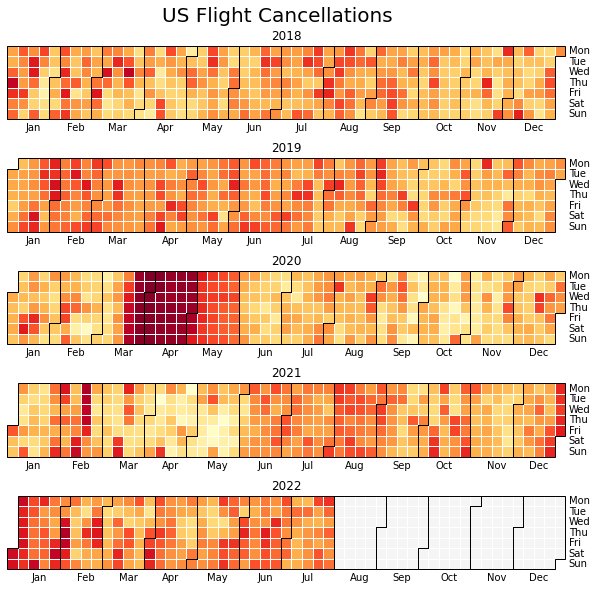

In [29]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

plt.show()

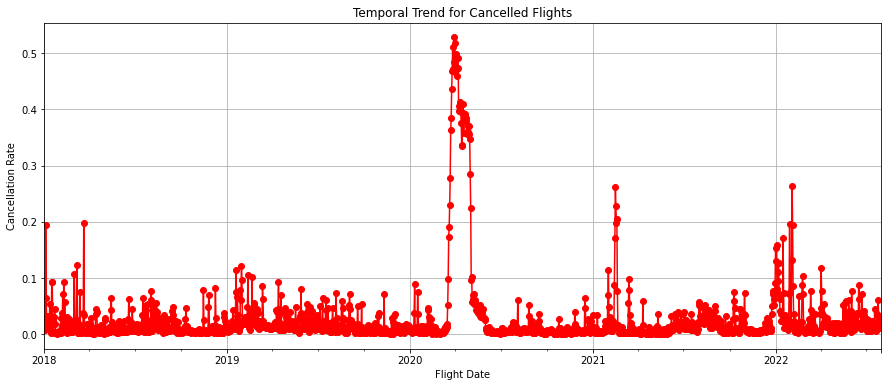

In [31]:
# Plotting the temporal trend for cancelled flights

plt.figure(figsize=(15, 6))
events.plot(kind='line', marker='o', color='red')
plt.title('Temporal Trend for Cancelled Flights')
plt.xlabel('Flight Date')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()

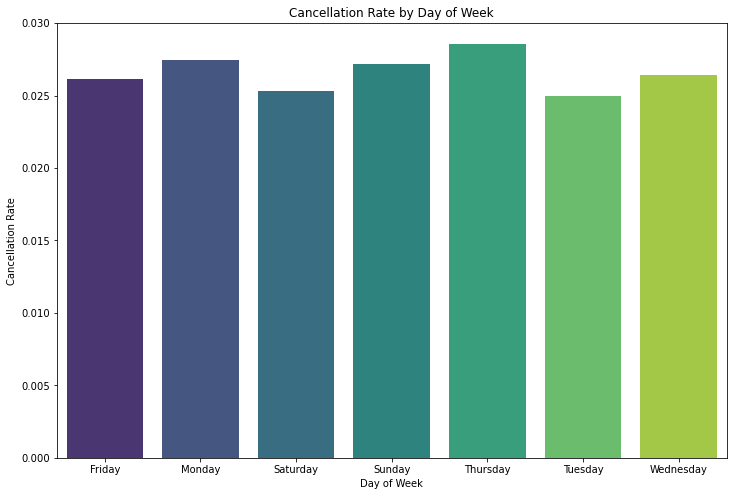

In [32]:
# Extract the day of the week from the FlightDate
df['DayOfWeek'] = df['FlightDate'].dt.day_name()

# Calculate cancellation rate for each day of the week
cancellation_by_day = df.groupby('DayOfWeek')['Cancelled'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='DayOfWeek', y='Cancelled', data=cancellation_by_day, palette='viridis')
plt.title('Cancellation Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Cancellation Rate')
plt.show()

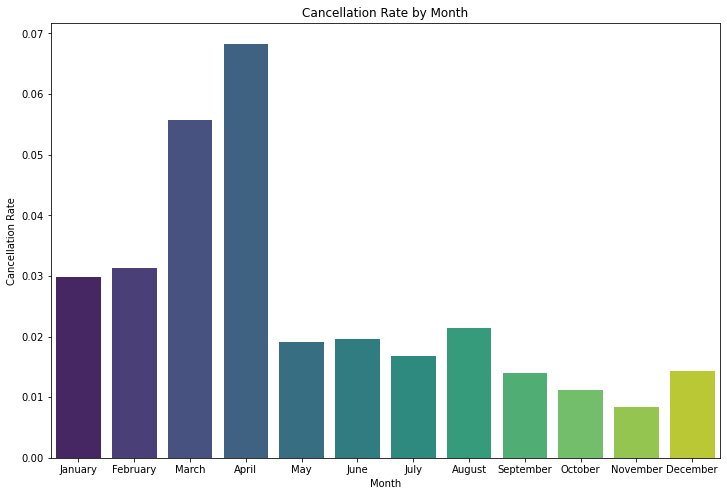

In [33]:
df['Month'] = df['FlightDate'].dt.month_name()
cancellation_by_month = df.groupby('Month')['Cancelled'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Cancelled', data=cancellation_by_month, order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], palette='viridis')
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.show()

## Relation of Flight Distance with Delay and Cancellation

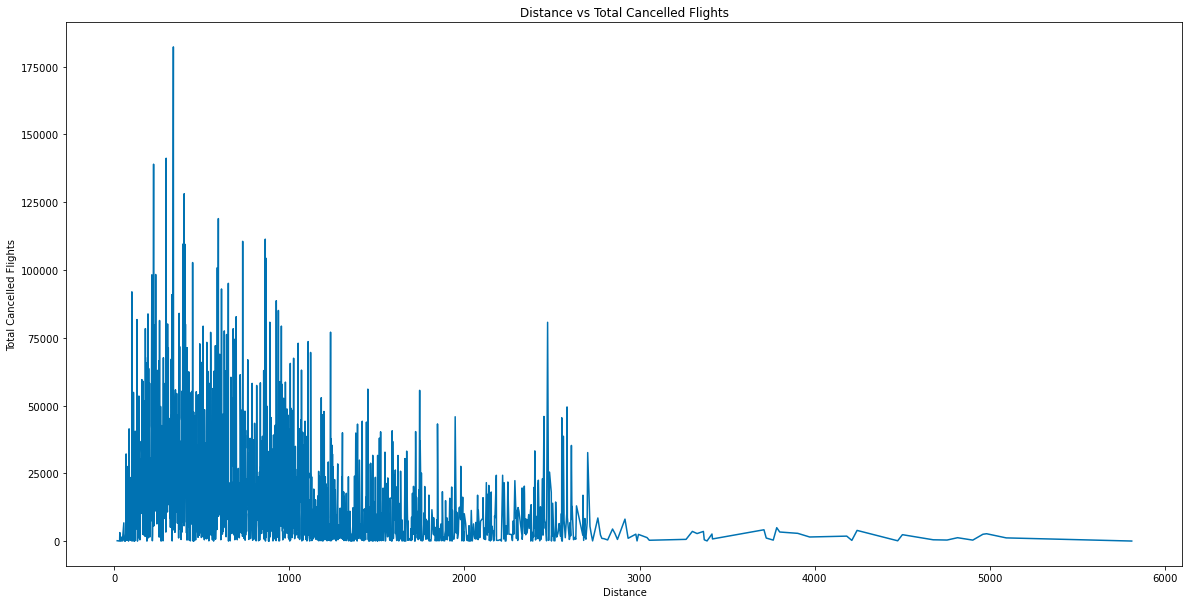

In [51]:
plt.figure(figsize = (20,10))
df.groupby('Distance')['Cancelled'].count().plot()
plt.title('Distance vs Total Cancelled Flights')
plt.ylabel('Total Cancelled Flightsz')
plt.show()

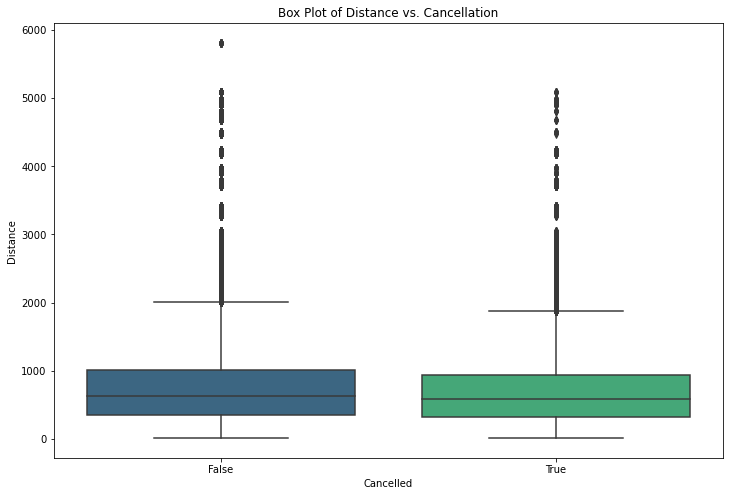

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cancelled', y='Distance', data=df, palette='viridis')
plt.title('Box Plot of Distance vs. Cancellation')
plt.xlabel('Cancelled')
plt.ylabel('Distance')
plt.show()

In [36]:
correlation_distance_delay = df['Distance'].corr(df['DepDelayMinutes'])
print(f'Correlation between Distance and Departure Delay: {correlation_distance_delay}')

Correlation between Distance and Departure Delay: 0.009179520561873792


In [37]:
mean_delay_by_distance = df.groupby('Distance')['DepDelayMinutes'].mean().reset_index()
median_delay_by_distance = df.groupby('Distance')['DepDelayMinutes'].median().reset_index()

Text(0.5, 1.0, 'Average Flight Delay by Day of Year')

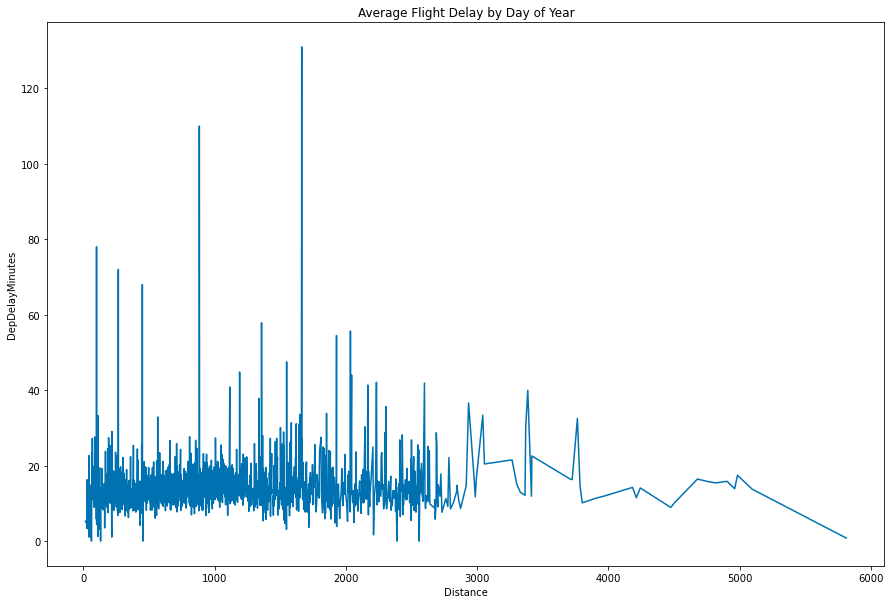

In [41]:
plt.figure(figsize=(15, 10))


sns.lineplot(x='Distance', y='DepDelayMinutes', data=mean_delay_by_distance, ci=None)
plt.title('Average Flight Delay by Day of Year')

Text(0.5, 1.0, 'Average Flight Delay by Day of Year')

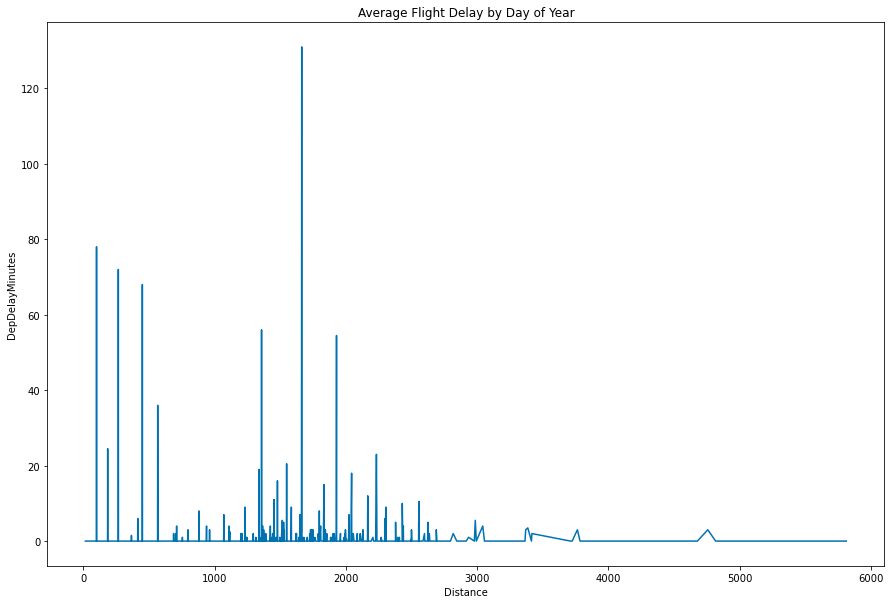

In [42]:
plt.figure(figsize=(15, 10))


sns.lineplot(x='Distance', y='DepDelayMinutes', data=median_delay_by_distance, ci=None)
plt.title('Average Flight Delay by Day of Year')

# Comparing Airlines

Which airline has the most delays, most cancellation and which one is more reliable?



### Airline with most number of flights

Text(0.5, 0, 'Flights (100k)')

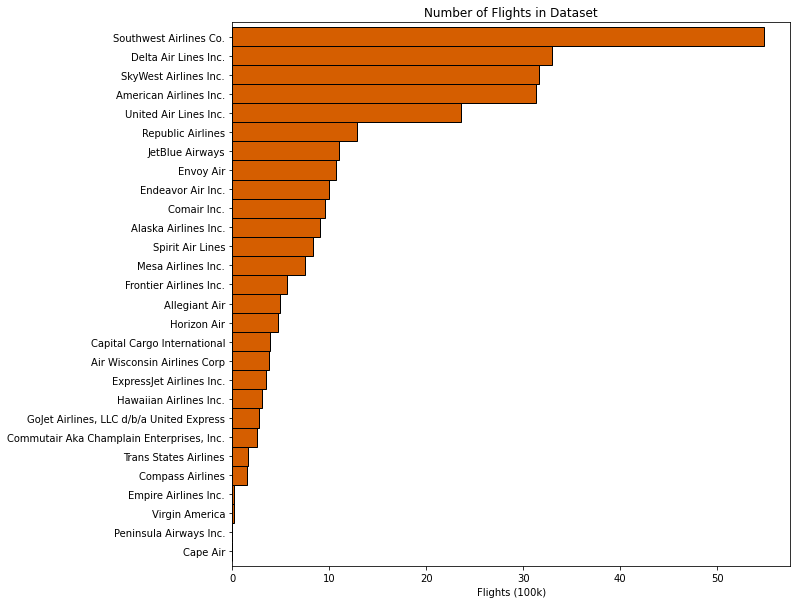

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

Minimum 1M Flights airline

In [52]:
# Filtering top airlines - greater than 1,000,000 count of flights

top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 1_000_000")["index"]
    .values.tolist()
)

In [53]:
df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [54]:
# Reset airline categories

df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

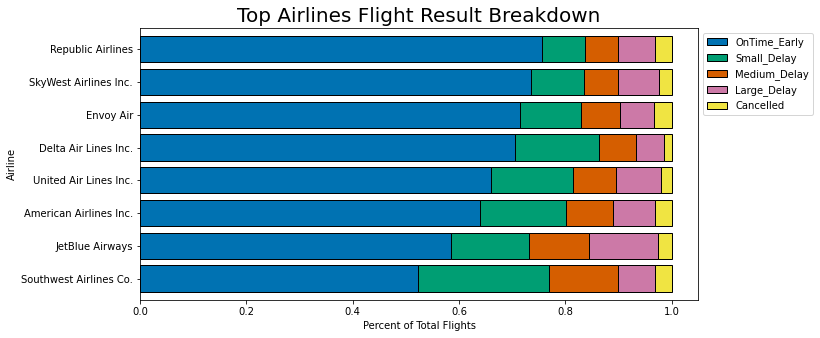

In [55]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

### Splitting each delay type and then plot

In [56]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

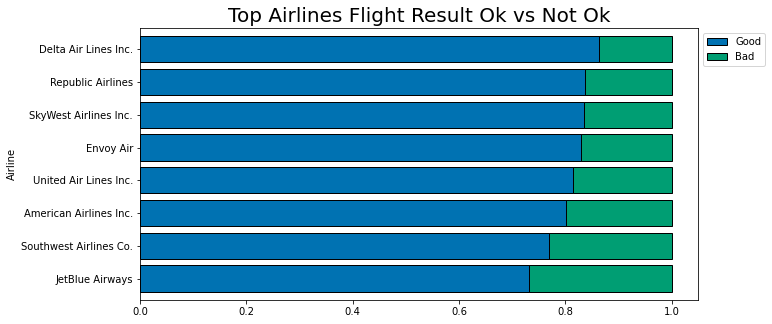

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()

In [124]:
del(df_top)

import gc

gc.collect()

4006387

### Airline with most delays

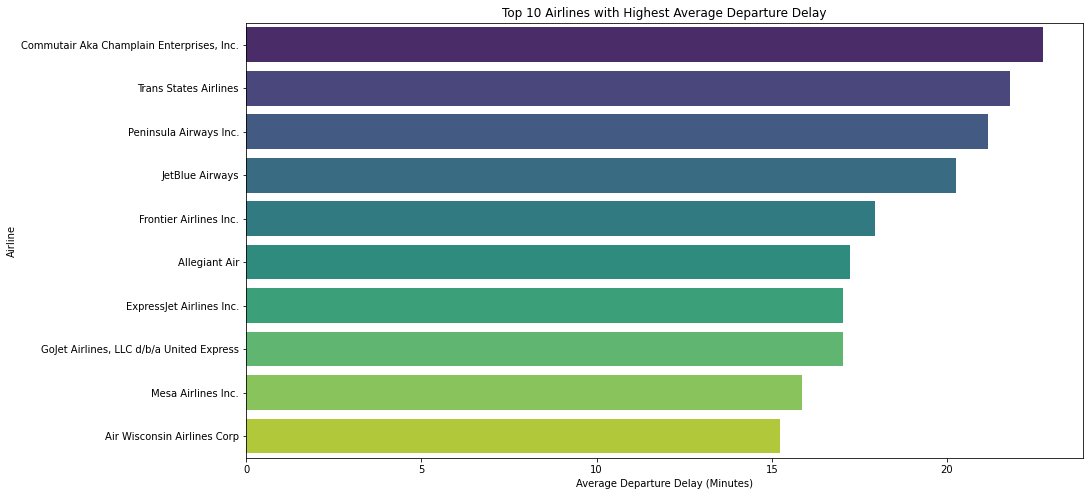

In [93]:
mean_delay_by_airline = df.groupby('Airline')['DepDelayMinutes'].mean().sort_values(ascending=False).reset_index()

# Bar plot for most delays by airline
plt.figure(figsize=(15, 8))
sns.barplot(x='DepDelayMinutes', y='Airline', data=mean_delay_by_airline.head(10),order = mean_delay_by_airline['Airline'].head(10),
            palette='viridis')
plt.title('Top 10 Airlines with Highest Average Departure Delay')
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Airline')
plt.show()

### Most Cancellation by airline

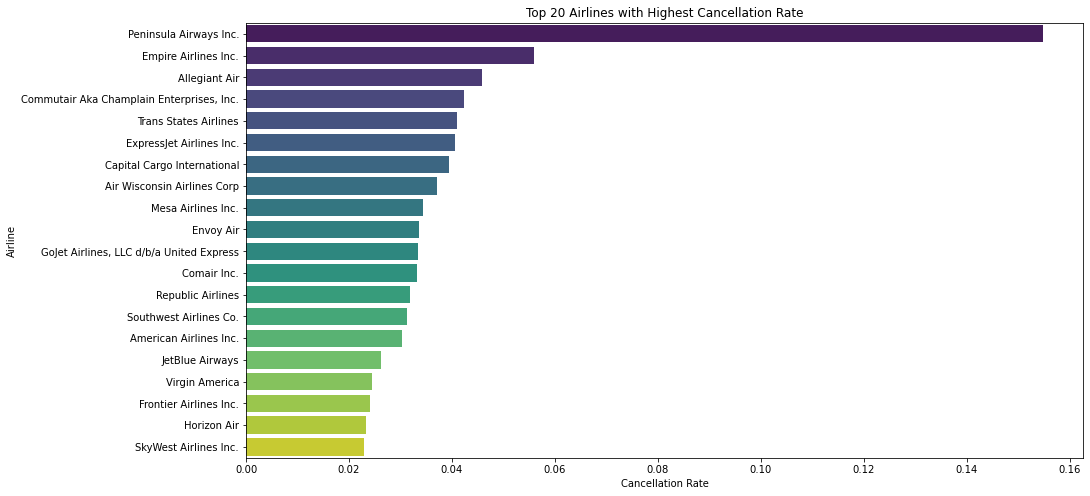

In [87]:
# Assuming df is your DataFrame

# Convert 'Cancelled' column to numeric (in case it's not)
df['Cancelled'] = pd.to_numeric(df['Cancelled'])

# Group by airline and calculate the cancellation rate
cancellation_rate_by_airline = df.groupby('Airline')['Cancelled'].mean().sort_values(ascending=False).reset_index()

# Bar plot for most cancellations by airline
plt.figure(figsize=(15, 8))
sns.barplot(x='Cancelled', y='Airline', data=cancellation_rate_by_airline.head(20), order=cancellation_rate_by_airline['Airline'].head(20), palette='viridis')
plt.title('Top 20 Airlines with Highest Cancellation Rate')
plt.xlabel('Cancellation Rate')
plt.ylabel('Airline')
plt.show()


### Airline Reliability (Least Delays and Cancellation)

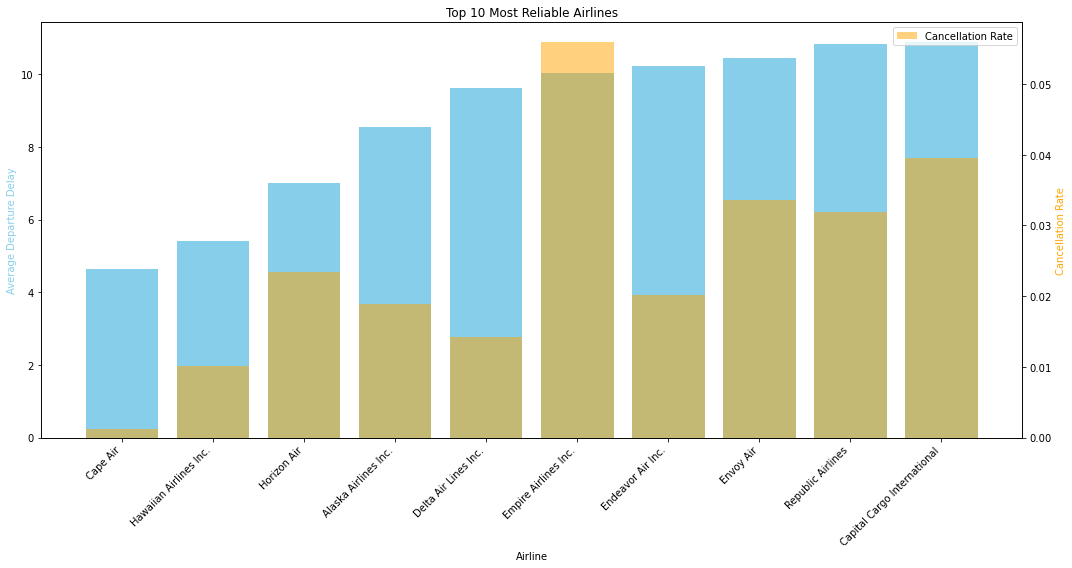

In [103]:
reliability_by_airline = df.groupby('Airline').agg({
    'DepDelayMinutes': 'mean',
    'Cancelled': 'mean'
}).sort_values(by=['DepDelayMinutes', 'Cancelled'], ascending=[True, True]).reset_index()

plt.figure(figsize=(15, 8))

bar_positions = np.arange(len(reliability_by_airline.head(10)))
plt.bar(bar_positions, reliability_by_airline['DepDelayMinutes'].head(10), color='skyblue', label='Avg Delay')

plt.title('Top 10 Most Reliable Airlines')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay', color='skyblue')
plt.xticks(bar_positions, reliability_by_airline['Airline'].head(10), rotation=45, ha='right')

ax2 = plt.gca().twinx()
ax2.bar(bar_positions, reliability_by_airline['Cancelled'].head(10), color='orange', alpha=0.5, label='Cancellation Rate')
ax2.set_ylabel('Cancellation Rate', color='orange')

plt.legend()
plt.tight_layout()
plt.show()


# Impact of COVID on Flights

In [111]:
df.loc[df['FlightDate']>= '2020-01-01','Pandemic'] = 'During Pandemic'
df.loc[df['FlightDate']< '2020-01-01','Pandemic'] = 'Before Pandemic'

In [128]:
# Group by month and count flights
monthly_flight_count = df.groupby(['Pandemic', df['FlightDate'].dt.to_period("M").values])['FlightDate'].count().reset_index()

In [114]:
monthly_flight_count

,Pandemic,Month,FlightDate
0,Before Pandemic,April,1151242
1,Before Pandemic,August,1221068
2,Before Pandemic,December,1329266
3,Before Pandemic,February,851071
4,Before Pandemic,January,1096337
5,Before Pandemic,July,1084905
6,Before Pandemic,June,1012182
7,Before Pandemic,March,1035353
8,Before Pandemic,May,1044355
9,Before Pandemic,November,1294057


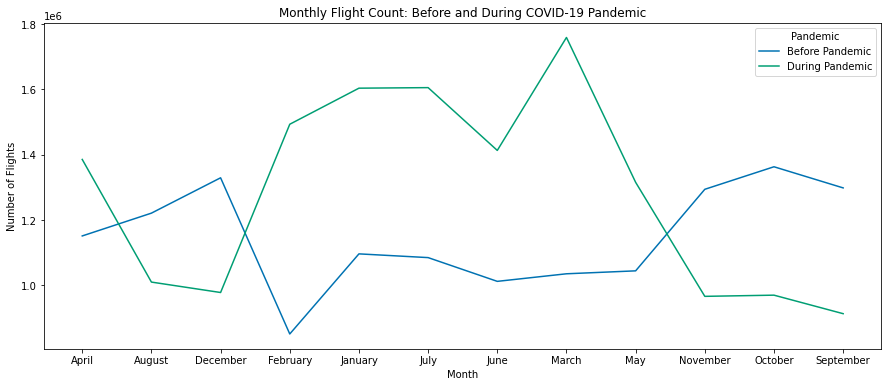

In [118]:
# Plotting monthly flight count
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='FlightDate', hue='Pandemic', data=monthly_flight_count)
plt.title('Monthly Flight Count: Before and During COVID-19 Pandemic')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

In [ ]:
df['FlightDate'].dt.to_period("M")

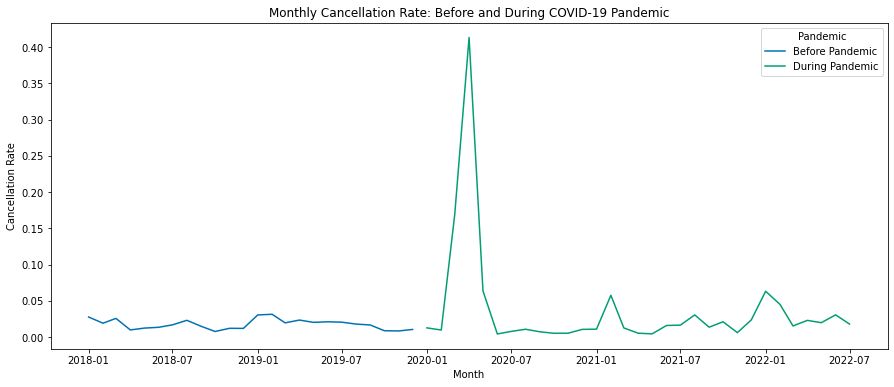

In [126]:
# Group by month and calculate the cancellation rate
monthly_cancellation_rate = df.groupby(['Pandemic', df['FlightDate'].dt.to_period("M")])['Cancelled'].mean().reset_index()

# Convert 'FlightDate' back to datetime
monthly_cancellation_rate['FlightDate'] = monthly_cancellation_rate['FlightDate'].dt.to_timestamp()

# Plotting monthly cancellation rate
plt.figure(figsize=(15, 6))
sns.lineplot(x='FlightDate', y='Cancelled', hue='Pandemic', data=monthly_cancellation_rate)
plt.title('Monthly Cancellation Rate: Before and During COVID-19 Pandemic')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.show()